In [21]:
"""

Full dataset
--------------------------------------------------------------------------------------------------------------------------------------------------------
|                                                                                                                                                      |
--------------------------------------------------------------------------------------------------------------------------------------------------------

Regular Splitting
--------------------------------------------------------------------------------------------------------------------------------------------------------
|                                        70%                                                          |             15%         |         15%          |
--------------------------------------------------------------------------------------------------------------------------------------------------------

Cross-Validation (this is a KFold - this specific one would be 8 Fold validation)
--------------------------------------------------------------------------------------------------------------------------------------------------------
|       1        |          2        |         3        |           4        |          5        |         6         |         7        |      8       |
--------------------------------------------------------------------------------------------------------------------------------------------------------

1. '1' would be the validation set and others would be the training set
2. '2' would be the validation set and others would be the training set
3. '3' would be the validation set and others would be the training set
.
.
.
8. '8' would be the validation set and others would be the training set

"""

"\n\nFull dataset\n--------------------------------------------------------------------------------------------------------------------------------------------------------\n|                                                                                                                                                      |\n--------------------------------------------------------------------------------------------------------------------------------------------------------\n\nRegular Splitting\n--------------------------------------------------------------------------------------------------------------------------------------------------------\n|                                        70%                                                          |             15%         |         15%          |\n--------------------------------------------------------------------------------------------------------------------------------------------------------\n\nCross-Validation (this is a KFold 

### 1. Importing Dependancies

In [17]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression #this is the model we are using here (not deep diving) //derived from sigmoid
from sklearn.model_selection import (
                                StratifiedKFold,
                                cross_validate
                                )
from sklearn.metrics import (
                                confusion_matrix,
                                f1_score,
                                accuracy_score,
                                precision_score,
                                recall_score
                                )


warnings.filterwarnings('ignore')

### 2. Loading the Data

In [2]:
X_train = np.load('artifacts\X_train.npz') ['arr_0']
Y_train = np.load('artifacts\Y_train.npz')  ['arr_0']
X_test = np.load('artifacts\X_test.npz')  ['arr_0']
Y_test = np.load('artifacts\Y_test.npz')  ['arr_0']

### 3. Configure K-Fold CV

In [3]:
# cv = cross-validation

cv = StratifiedKFold(
                        n_splits=6,
                        random_state=42,
                        shuffle=True #by shuffling you make the operation more random, that means better performance
)

In [4]:
model_lr = LogisticRegression(
                                random_state = 42,
                                max_iter = 1000
                                )

In [5]:
cv_results = cross_validate(
                            model_lr,
                            X_train,
                            Y_train,
                            cv=cv, scoring='accuracy',
                            return_train_score=True
                            )

In [6]:
cv_results

{'fit_time': array([0.03396082, 0.01998305, 0.01798463, 0.01798487, 0.02100754,
        0.01954675]),
 'score_time': array([0.        , 0.00099754, 0.00101662, 0.00099897, 0.00099921,
        0.00116968]),
 'test_score': array([0.73816288, 0.71117424, 0.73235433, 0.7408811 , 0.72666982,
        0.73519659]),
 'train_score': array([0.73001137, 0.73484274, 0.73013167, 0.72927915, 0.73363645,
        0.72927915])}

In [7]:
score_array = ['accuracy', 'precision', 'recall', 'f1']

for score in score_array:
    cv_results = cross_validate(
                                model_lr,
                                X_train,
                                Y_train,
                                cv=cv,
                                scoring=score,  # also fix this to use 'score', not 'accuracy'
                                return_train_score=False
                                )   
    
    test_score = cv_results['test_score']

    test_score_avg = np.mean(test_score)
    print(f"{score} : {test_score_avg}")


accuracy : 0.7307398281129629
precision : 0.7288789340436259
recall : 0.7349243321844033
f1 : 0.731872171052841


In [8]:
cv_results = cross_validate(
                                model_lr,
                                X_train,
                                Y_train,
                                cv=cv,
                                scoring='f1',  # also fix this to use 'f1', beacuse dependig on f1 score is reliable rather than accuracy
                                return_train_score=False
                                )  

cv_results

{'fit_time': array([0.03101182, 0.02050114, 0.02000785, 0.02041006, 0.02097869,
        0.02198911]),
 'score_time': array([0.00202298, 0.00150537, 0.00200534, 0.00202131, 0.00201988,
        0.00202012]),
 'test_score': array([0.73729216, 0.71280603, 0.73436765, 0.74063537, 0.72795851,
        0.7381733 ])}

in here in the 'test_score' array:

- `0.73729216` means that this is the f1 score in the 1st split in the 6 Fold validation setup
- `0.73729216` means that this is the f1 score in the 2nd split in the 6 Fold validation setup
- `0.73436765` means that this is the f1 score in the 3rd split in the 6 Fold validation setup
- `0.74063537` means that this is the f1 score in the 4th split in the 6 Fold validation setup
- `0.72795851` means that this is the f1 score in the 5th split in the 6 Fold validation setup
- `0.7381733` means that this is the f1 score in the 6th split in the 6 Fold validation setup

so we can get an idea which split is the split that the model performing at the best

In [9]:
best_index = np.argmax(cv_results['test_score']) #after that we can get the best index from here (that has the best f1 score)

fold_indices = list(cv.split(X_train, Y_train))  #from this we can get all the indexes
fold_indices

[(array([    0,     1,     2, ..., 12665, 12666, 12667]),
  array([    5,    15,    23, ..., 12655, 12658, 12663])),
 (array([    2,     3,     5, ..., 12664, 12665, 12667]),
  array([    0,     1,     4, ..., 12651, 12661, 12666])),
 (array([    0,     1,     3, ..., 12665, 12666, 12667]),
  array([    2,    10,    18, ..., 12653, 12659, 12664])),
 (array([    0,     1,     2, ..., 12664, 12666, 12667]),
  array([   11,    13,    22, ..., 12646, 12656, 12665])),
 (array([    0,     1,     2, ..., 12665, 12666, 12667]),
  array([    6,     7,     8, ..., 12648, 12657, 12660])),
 (array([    0,     1,     2, ..., 12664, 12665, 12666]),
  array([    3,    16,    24, ..., 12654, 12662, 12667]))]

In [10]:
best_train_idx, best_text_idx = fold_indices[best_index]
best_train_idx, best_train_idx

# this train index means the 5 splits from the train test (its creating internally not externally)

(array([    0,     1,     2, ..., 12664, 12666, 12667]),
 array([    0,     1,     2, ..., 12664, 12666, 12667]))

In [12]:
best_train_idx, best_text_idx = fold_indices[best_index]

X_train_best = X_train[best_train_idx]
Y_train_best = Y_train[best_train_idx]
X_test_best = X_train[best_train_idx]
Y_test_best = Y_train[best_train_idx]

In [51]:
len(X_train)

12668

In [13]:
model_lr = LogisticRegression(
                                random_state = 42, #random seed means that if you do random operations if you are not setting a state it will always produce different results
                                max_iter = 1000  #how many iterations //if increase training time might be bit high
                                )

model_lr.fit(X_train_best, Y_train_best) 

LogisticRegression(max_iter=1000, random_state=42)

In [14]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

In [18]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1_score = f1_score(Y_test, Y_hat_test)

In [ ]:
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1_score: {f1_score}")

accuracy: 0.6948474237118559
precision: 0.3392857142857143
recall: 0.6569148936170213
f1_score: 0.4474637681159421


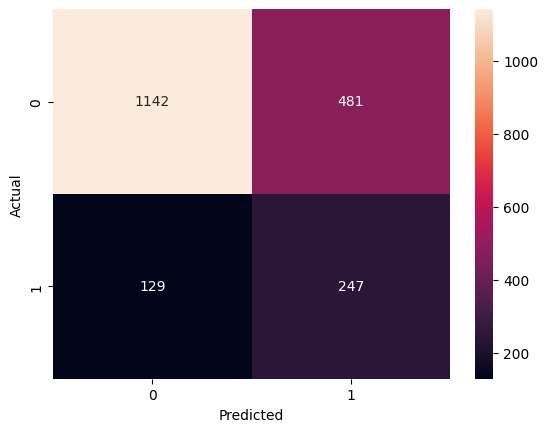

In [20]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

its not imporved a lot because logistic regression is a very weak model.